<a href="https://colab.research.google.com/github/Monikka200418/College-event_feedback/blob/main/event.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import files
uploaded = files.upload()

Saving event_feedback.csv.csv to event_feedback.csv (1).csv


In [16]:
import pandas as pd

# Load the CSV file into a DataFrame, specifying the delimiter and handling bad lines
df = pd.read_csv('event_feedback.csv.csv', sep=',', on_bad_lines='skip')

In [ ]:
print(df.head())
print(df.info())


           event                                           feedback  rating
0  Cultural Fest  The music show was awesome and the volunteers ...       5
1  Cultural Fest             Loved the food and the friendly staff.       5
2  Cultural Fest  The event was too crowded and the sound system...       2
3  Cultural Fest  The event started late and there was no space ...       2
4  Cultural Fest          Snacks were tasty and the games were fun.       4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   event     99 non-null     object
 1   feedback  99 non-null     object
 2   rating    99 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.4+ KB
None


In [ ]:
df = df.drop_duplicates()


In [ ]:
print(df.isnull().sum())


event       0
feedback    0
rating      0
dtype: int64


In [ ]:
df['feedback'] = df['feedback'].str.strip().str.capitalize()

In [ ]:
# Define a function to compute polarity and sentiment label
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(str(text))
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to the 'feedback' column
df['Sentiment'] = df['feedback'].apply(get_sentiment)
print(df[['feedback', 'Sentiment']].head())
print(df['Sentiment'].value_counts())

                                            feedback Sentiment
0  The music show was awesome and the volunteers ...  Positive
1             Loved the food and the friendly staff.  Positive
2  The event was too crowded and the sound system...   Neutral
3  The event started late and there was no space ...  Negative
4          Snacks were tasty and the games were fun.  Positive
Sentiment
Positive    50
Neutral     29
Negative    20
Name: count, dtype: int64


/tmp/ipython-input-8-3004743876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


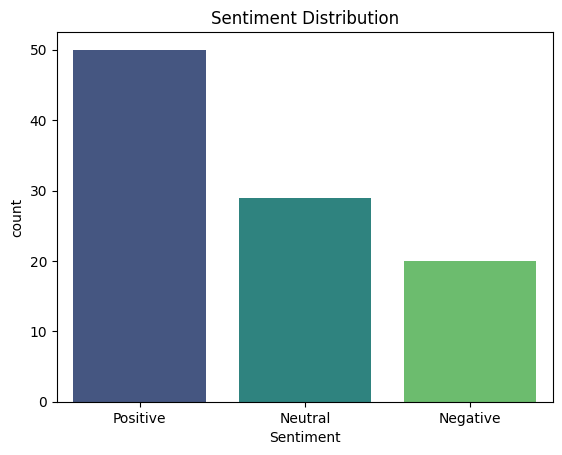

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
print(df['rating'].describe())

count    99.000000
mean      3.585859
std       1.269823
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64


In [ ]:
import pandas as pd

# Load your CSV file with appropriate parameters to handle parsing issues
df = pd.read_csv('event_feedback.csv.csv', sep=',', on_bad_lines='skip')

# If you have multiple events, filter for a specific event
event_name = "Cultural Fest"
event_df = df[df['event'] == event_name]
event_df['feedback'] = event_df['feedback'].str.strip().str.capitalize()
event_df = event_df.dropna(subset=['feedback'])
print(event_df['rating'].describe())
print(event_df['rating'].value_counts())


count    99.000000
mean      3.585859
std       1.269823
min       1.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64
rating
5    37
2    27
3    21
4    13
1     1
Name: count, dtype: int64


/tmp/ipython-input-11-939601412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=event_df, palette='Blues')


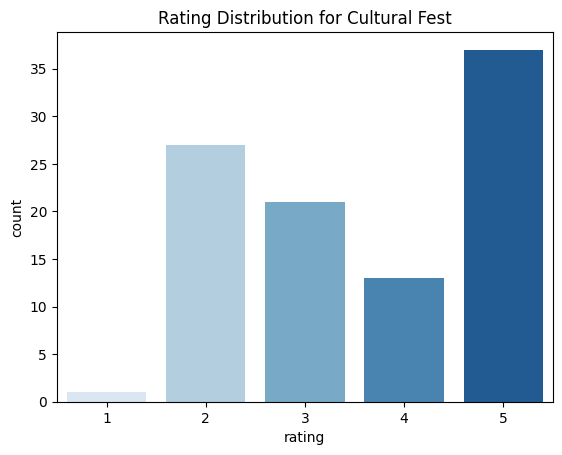

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='rating', data=event_df, palette='Blues')
plt.title('Rating Distribution for Cultural Fest')
plt.show()

In [ ]:
# Recommendations
print("\nRecommendations:")
print("1. Improve event organization based on negative feedback.")
print("2.Continue with the current planning methods, as many attendees praised the event’s organization.")
print("3.Address recurring sound quality complaints by investing in better audio equipment and conducting sound checks.")


Recommendations:
1. Improve event organization based on negative feedback.
2.Continue with the current planning methods, as many attendees praised the event’s organization.
3.Address recurring sound quality complaints by investing in better audio equipment and conducting sound checks.
